<div style="text-align: center;">
    <h1>Heart Disease Uci Analysis</h1>
</div> 

### 

**About:**

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

**Discription:**

id (Unique id for each patient)
age (Age of the patient in years)
origin (place of study)
sex (Male/Female)
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
chol (serum cholesterol in mg/dl)
fbs (if fasting blood sugar > 120 mg/dl)
restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
thalach: maximum heart rate achieved
exang: exercise-induced angina (True/ False)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by fluoroscopy
thal: [normal; fixed defect; reversible defect]
num: the predicted attribute

**To do:**

Data Loading and Exploration:

Load the dataset into a pandas DataFrame.
Display the first few rows to understand the structure of the data.
Check for missing values and handle them if necessary.
Descriptive Statistics:

Compute basic descriptive statistics for numerical columns (mean, median, standard deviation).
Explore the distribution of age in the dataset.
Calculate the percentage of males and females in the dataset.
Correlation Analysis:

Compute the correlation matrix for numerical attributes.
Visualize the correlation matrix using a heatmap.
Gender-based Analysis:

Explore the distribution of heart disease based on gender.
Calculate the average age of patients with and without heart disease for each gender.
Age Distribution:

Create age bins and visualize the distribution of heart disease across different age groups.
Chest Pain Type Analysis:

Analyze the distribution of chest pain types.
Explore the relationship between chest pain type and the presence of heart disease.
Blood Pressure and Cholesterol Analysis:

Visualize the distribution of resting blood pressure and serum cholesterol.
Explore the relationship between these variables and the presence of heart disease.
Heart Rate Analysis:

Analyze the distribution of maximum heart rates achieved during exercise.
Compare the heart rates of patients with and without heart disease.
Angina and Exercise Analysis:

Explore the relationship between exercise-induced angina and the presence of heart disease.
Analyze the distribution of ST depression induced by exercise.
Visualization:

Create visualizations (e.g., bar charts, histograms, box plots) to represent key relationships and insights

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart_disease_uci.csv")

### Cleaning Data: 

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [5]:
df.shape

(920, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Looks like it has plenty of missing values

Let's deal with them:

In [7]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
df.fillna(value = {
    'trestbps' : df['trestbps'].mean(),
    'chol' : df['chol'].mean(),
    'fbs' : df['fbs'].mode()[0],
    'restecg' : df['restecg'].mode()[0],
    'thalch' : df['thalch'].mean(),
    'exang' : df['exang'].mode()[0],
    'oldpeak' : df['oldpeak'].mean(),
    'slope' : df['slope'].mode()[0],
    'ca' : df['ca'].mean(),
    'thal' : df['thal'].mode()[0]
}, inplace = True)

In [9]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,flat,0.676375,normal,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,flat,0.676375,normal,0
919,920,62,Male,VA Long Beach,atypical angina,120.000000,254.0,False,lv hypertrophy,93.000000,True,0.000000,flat,0.676375,normal,1


### Descriptive Statistics: 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.5+ KB


In [11]:
df = df.astype({
    "id" : np.int16,
    "age" : np.int8,
    "trestbps" : np.float32,
    "chol" : np.float32,
    "thalch" : np.float32,
    "oldpeak" : np.float16,
    "ca" : np.int8,
    "num" : np.int8
})

In [12]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.300781,downsloping,0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.500000,flat,3,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.599609,flat,2,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.500000,downsloping,0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.400391,upsloping,0,normal,0


In [13]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,132.132401,199.130325,137.545670,0.878906,0.227174,0.995652
std,265.725422,9.424685,18.443909,108.957764,25.138496,1.053711,0.628936,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.599609,0.000000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,221.000000,138.000000,0.799805,0.000000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,0.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.199219,3.000000,4.000000


### Correlation Analysis: 

In [14]:
df.corr(numeric_only = True)

,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
id,1.000000,0.239301,0.049369,-0.372984,0.148983,-0.436795,0.166239,0.046483,-0.385881,0.273552
age,0.239301,1.000000,0.235253,-0.084499,0.219915,-0.353471,0.160910,0.248077,0.219413,0.339596
trestbps,0.049369,0.235253,1.000000,0.088290,0.148398,-0.104616,0.149040,0.160266,0.036427,0.116225
chol,-0.372984,-0.084499,0.088290,1.000000,0.089718,0.226325,-0.031472,0.045497,0.155212,-0.228238
fbs,0.148983,0.219915,0.148398,0.089718,1.000000,-0.030271,-0.003475,0.050353,0.061260,0.129539
thalch,-0.436795,-0.353471,-0.104616,0.226325,-0.030271,1.000000,-0.349828,-0.149628,0.040328,-0.351055
exang,0.166239,0.160910,0.149040,-0.031472,-0.003475,-0.349828,1.000000,0.382078,0.037478,0.350567
oldpeak,0.046483,0.248077,0.160266,0.045497,0.050353,-0.149628,0.382078,1.000000,0.210521,0.421909
ca,-0.385881,0.219413,0.036427,0.155212,0.061260,0.040328,0.037478,0.210521,1.000000,0.261797
num,0.273552,0.339596,0.116225,-0.228238,0.129539,-0.351055,0.350567,0.421909,0.261797,1.000000


In [15]:
correlation = df.corr(numeric_only = True)
correlation[correlation.abs() > 0.5]

,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
fbs,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
thalch,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
exang,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


- **The numeric Columns has no correlation in them.**

<Axes: >

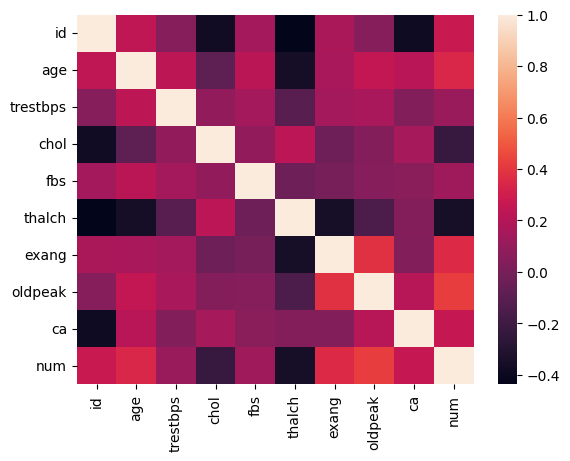

In [16]:
sns.heatmap(correlation)

### Age Distribution: 

Let's check the distribution of age: 

In [17]:
with_heart_disease = df[df['num'] != 0]
with_heart_disease['num'].unique()

array([2, 1, 3, 4], dtype=int8)

<Axes: xlabel='age', ylabel='Count'>

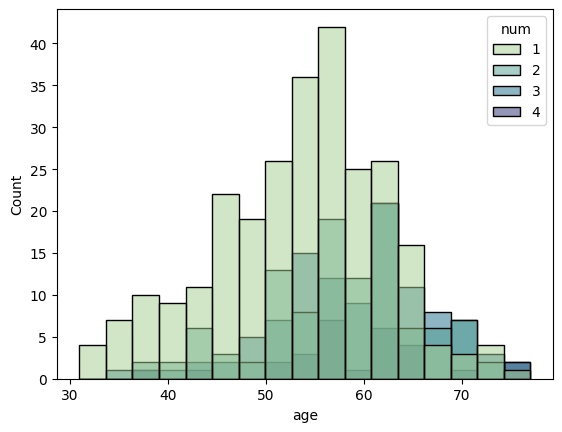

In [18]:
sns.histplot(with_heart_disease, x = 'age', hue = 'num', palette = 'crest')

- **Most heart disease patients are mainly adults of age 45 to 65.**

### **Gender-based Analysis:**

Lets' check the number of males and females:

In [19]:
with_heart_disease["sex"].value_counts()

Male      459
Female     50
Name: sex, dtype: int64

- Looks like **there are majority of male heart patients then females.**

Let's check what's the percentage is:

In [20]:
with_heart_disease["sex"].value_counts(normalize = True) * 100

Male      90.176817
Female     9.823183
Name: sex, dtype: float64

- **90% of males has heart disease, while 10% are females**

Let's find out the distribution of male and female patients on each origin:

In [21]:
with_heart_disease.groupby(['dataset', 'sex']).size()

dataset        sex   
Cleveland      Female     25
               Male      114
Hungary        Female     12
               Male       94
Switzerland    Female     10
               Male      105
VA Long Beach  Female      3
               Male      146
dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

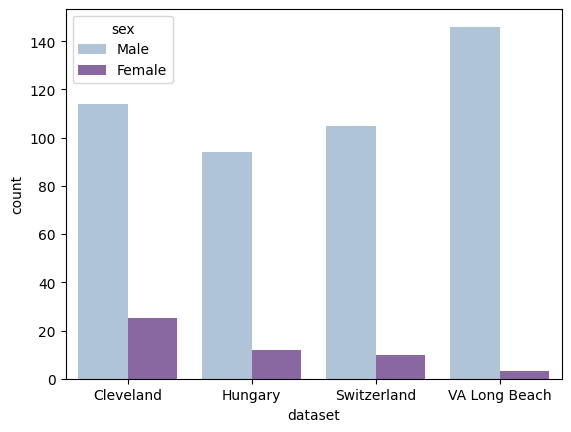

In [22]:
sns.countplot(x = "dataset", data = with_heart_disease, hue = "sex", palette = "BuPu")

### Distribution of Chest Pain(cp) types:

Let's explore the relationship between chest pain type and the presence of heart disease.

Let's find out number of each level of heart disease for each check pain types:

In [23]:
df.groupby(["cp", "num"])["num"].count()

cp               num
asymptomatic     0      104
                 1      197
                 2       89
                 3       83
                 4       23
atypical angina  0      150
                 1       19
                 2        2
                 3        3
non-anginal      0      131
                 1       37
                 2       14
                 3       18
                 4        4
typical angina   0       26
                 1       12
                 2        4
                 3        3
                 4        1
Name: num, dtype: int64

Let's visualize this result: 

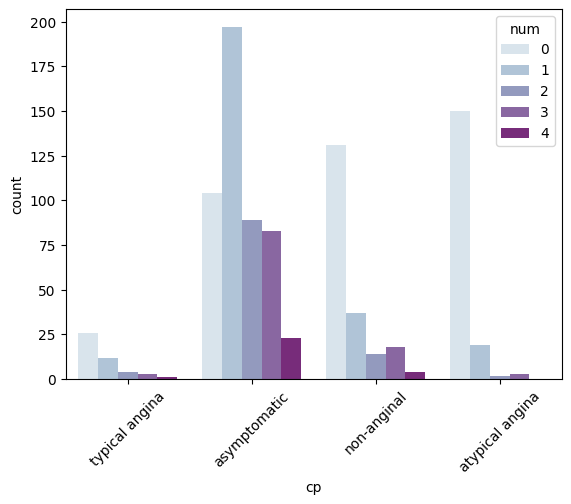

In [24]:
sns.countplot(x = "cp", data = df, hue = "num", palette = "BuPu")
plt.xticks(rotation = 45)
plt.show()

In [25]:
np.round(df.groupby("cp")["num"].value_counts(normalize = True) * 100, 2)

cp               num
asymptomatic     1      39.72
                 0      20.97
                 2      17.94
                 3      16.73
                 4       4.64
atypical angina  0      86.21
                 1      10.92
                 3       1.72
                 2       1.15
non-anginal      0      64.22
                 1      18.14
                 3       8.82
                 2       6.86
                 4       1.96
typical angina   0      56.52
                 1      26.09
                 2       8.70
                 3       6.52
                 4       2.17
Name: num, dtype: float64

- **People with Chest Pain types ```typical angina```, ```non-anginal``` and ```atypical angina``` has the lowest chance of having heart disease. Contrarary to that, people with ```asymptomatic``` chest pain has the highest chance of 79% to have heart disease.***

### Blood Pressure and Cholesterol Analysis: 

In [26]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.300781,downsloping,0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.500000,flat,3,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.599609,flat,2,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.500000,downsloping,0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.400391,upsloping,0,normal,0


Let's visualize the distribution of resting blood pressure and serum cholesterol.

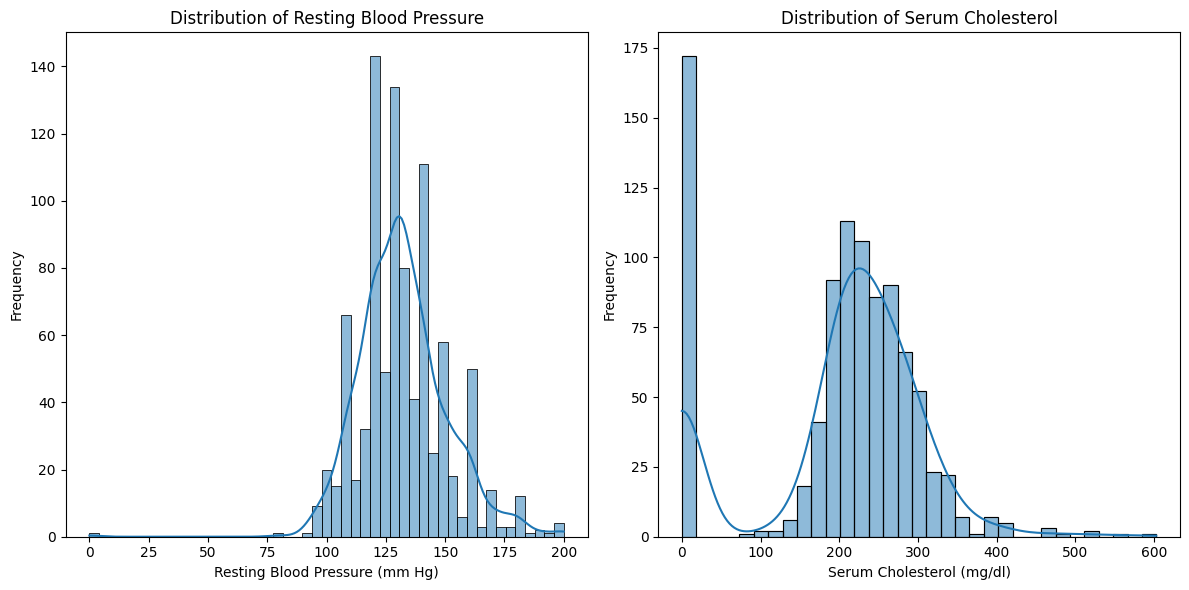

In [27]:
plt.figure(figsize=(12, 6))

# Histogram for Resting Blood Pressure
plt.subplot(1, 2, 1)
sns.histplot(df['trestbps'], kde=True)
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')

# Histogram for Serum Cholesterol
plt.subplot(1, 2, 2)
sns.histplot(df['chol'], kde=True)
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Let's visualize the relationship between them and heart disease:

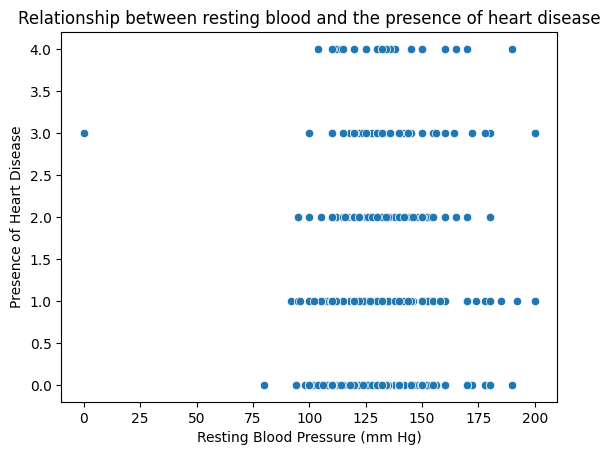

In [28]:
sns.scatterplot(x = "trestbps", y = "num", data = df)
plt.title('Relationship between resting blood and the presence of heart disease')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Presence of Heart Disease')
plt.show()

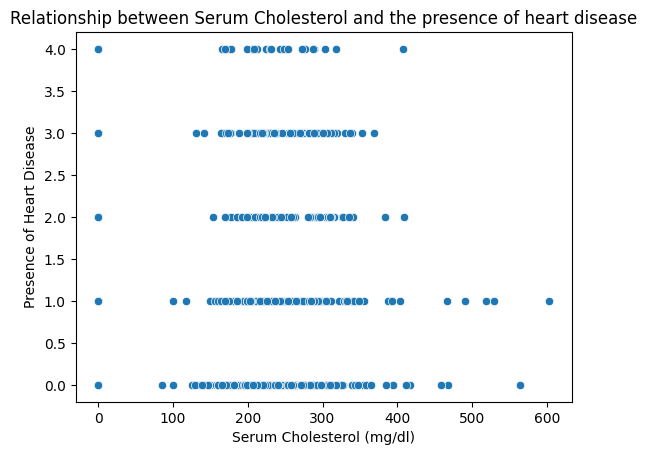

In [29]:
sns.scatterplot(x = "chol", y = "num", data = df)
plt.title('Relationship between Serum Cholesterol and the presence of heart disease')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.ylabel('Presence of Heart Disease')
plt.show()

### Heart Rate Analysis:

In [30]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.300781,downsloping,0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.500000,flat,3,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.599609,flat,2,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.500000,downsloping,0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.400391,upsloping,0,normal,0


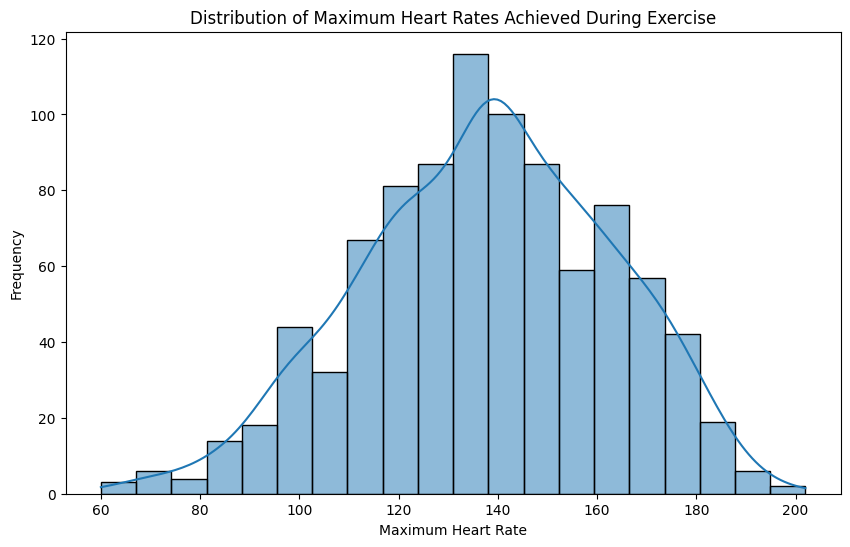

In [31]:
plt.figure(figsize = (10, 6))
sns.histplot(df['thalch'], kde = True)
plt.title('Distribution of Maximum Heart Rates Achieved During Exercise')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.show()

Let's check the distribution in terms of sex:

<Axes: xlabel='thalch', ylabel='Count'>

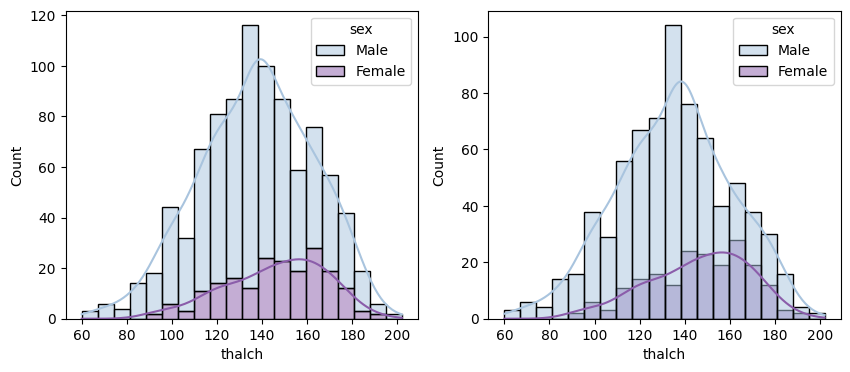

In [32]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.histplot(df, x = 'thalch', kde = True, hue = 'sex', multiple = 'stack', palette = 'BuPu')
plt.subplot(1,2,2)
sns.histplot(df, x = 'thalch', kde = True, hue = 'sex', multiple = 'layer', palette = 'BuPu')

- **Males achieve higher maximum heart rates then females during exercise.**

Let's compare the heart rates of patients with every stage of heart disease.

To do so let's create a column with heart disease and without heart disease:

In [33]:
df['heart_disease'] = np.where(df['num'] == 0, False, True)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,heart_disease
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.300781,downsloping,0,fixed defect,0,False
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.500000,flat,3,normal,2,True
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.599609,flat,2,reversable defect,1,True
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.500000,downsloping,0,normal,0,False
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.400391,upsloping,0,normal,0,False


In [34]:
df.dtypes

id                 int16
age                 int8
sex               object
dataset           object
cp                object
trestbps         float32
chol             float32
fbs                 bool
restecg           object
thalch           float32
exang               bool
oldpeak          float16
slope             object
ca                  int8
thal              object
num                 int8
heart_disease       bool
dtype: object

<Axes: xlabel='thalch', ylabel='Count'>

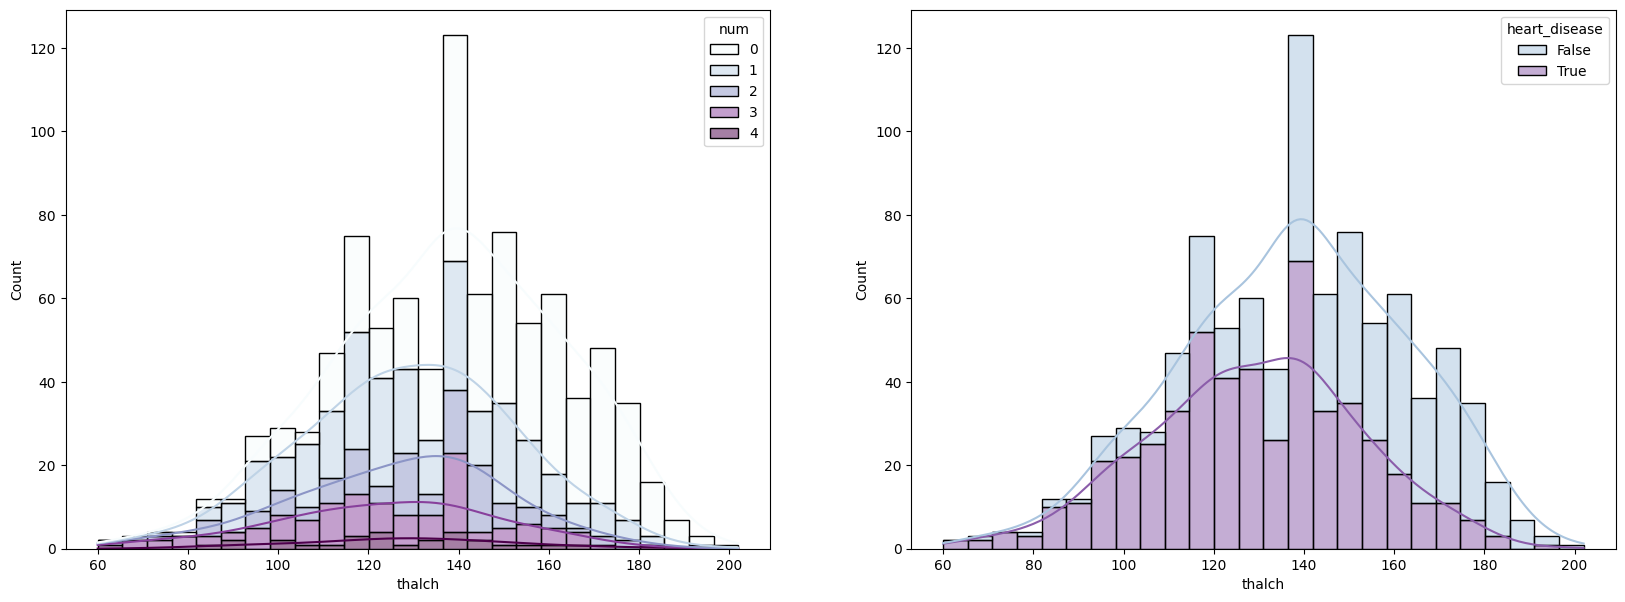

In [35]:
plt.figure(figsize = (20,7))

plt.subplot(1,2,1)
sns.histplot(df, x = 'thalch', bins = 26, kde = True, hue = 'num', multiple = 'stack', palette = 'BuPu')

plt.subplot(1,2,2)
sns.histplot(df, x = 'thalch', bins = 26, kde = True, hue = 'heart_disease', multiple = 'stack', palette = 'BuPu')

- **Persons with maximum heart rate achieved less then 110 are more likely to have heart disease.**

### Angina and Exercise Analysis: 

Let's explore the relationship between exercise-induced angina and the presence of heart disease.

In [36]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,heart_disease
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.300781,downsloping,0,fixed defect,0,False
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.500000,flat,3,normal,2,True
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.599609,flat,2,reversable defect,1,True
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.500000,downsloping,0,normal,0,False
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.400391,upsloping,0,normal,0,False


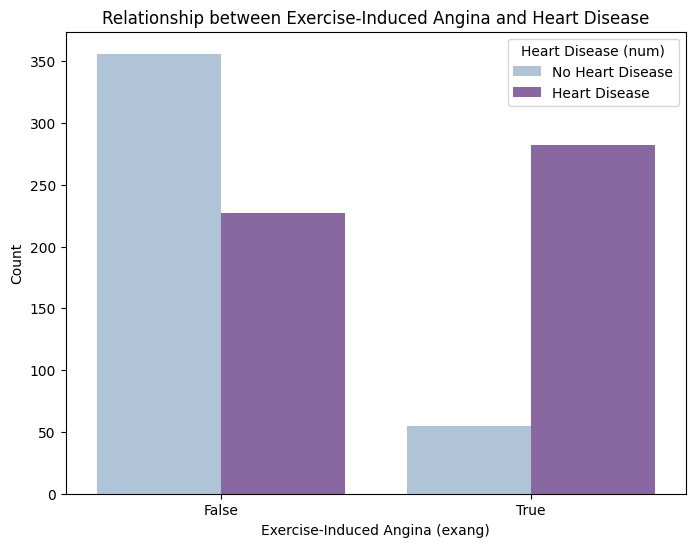

In [37]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'exang', hue = 'heart_disease', data = df, palette = 'BuPu')
plt.title('Relationship between Exercise-Induced Angina and Heart Disease')
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Count')
plt.legend(title = 'Heart Disease (num)', loc = 'upper right', labels = ['No Heart Disease', 'Heart Disease'])
plt.show()

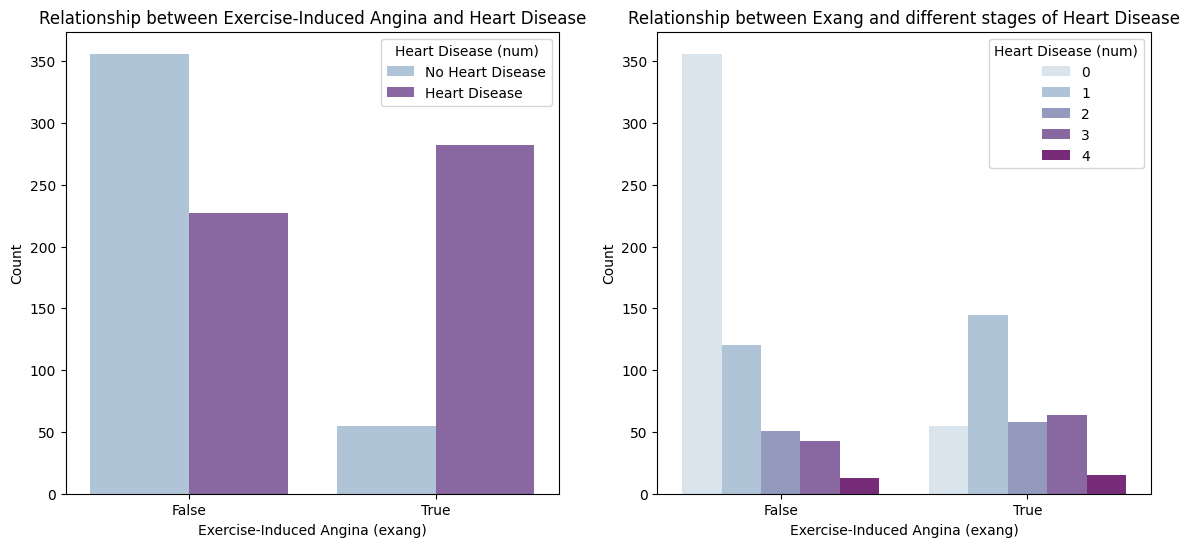

In [38]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
sns.countplot(x = 'exang', hue = 'heart_disease', data = df, palette = 'BuPu')
plt.title('Relationship between Exercise-Induced Angina and Heart Disease')
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Count')
plt.legend(title = 'Heart Disease (num)', loc = 'upper right', labels = ['No Heart Disease', 'Heart Disease'])

plt.subplot(1,2,2)
sns.countplot(x = 'exang', hue = 'num', data = df, palette = 'BuPu')
plt.title('Relationship between Exang and different stages of Heart Disease')
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Count')
plt.legend(title = 'Heart Disease (num)', loc = 'upper right')

In [39]:
percentage_heart_disease = df.groupby('exang')['heart_disease'].value_counts(normalize = True) * 100

print("Percentage of Heart Disease for Each Category of Exercise-Induced Angina:")
print(percentage_heart_disease)

Percentage of Heart Disease for Each Category of Exercise-Induced Angina:
exang  heart_disease
False  False            61.063465
       True             38.936535
True   True             83.679525
       False            16.320475
Name: heart_disease, dtype: float64


- **Patients with ```Exercise-Induced Angina``` are more likely to have heart disease with 83% chance. Patients without ```Exercise-Induced Angina``` has 39% chance to have heart disease.**

Now let's analyze the distribution of ST depression induced by exercise.

In [40]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,heart_disease
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.300781,downsloping,0,fixed defect,0,False
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.500000,flat,3,normal,2,True
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.599609,flat,2,reversable defect,1,True
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.500000,downsloping,0,normal,0,False
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.400391,upsloping,0,normal,0,False


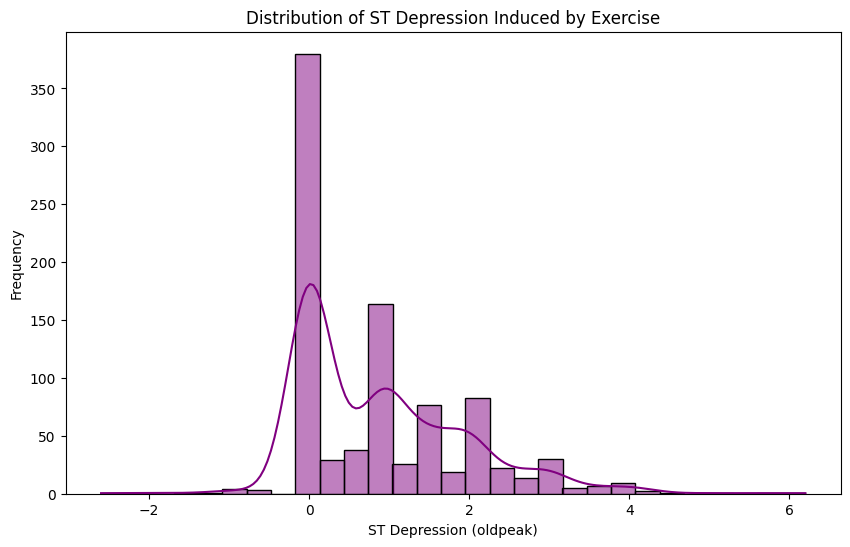

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['oldpeak'], kde = True, color='Purple')
plt.title('Distribution of ST Depression Induced by Exercise')
plt.xlabel('ST Depression (oldpeak)')
plt.ylabel('Frequency')
plt.show()

### 

## Conclusion: 

- **The numeric Columns has no correlation in them.**
- **There are majority of male heart patients then females.**
- **90% of males has heart disease, while 10% are females**
- **Patients with Chest Pain types ```typical angina```, ```non-anginal``` and ```atypical angina``` has the lowest chance of having heart disease. Contrarary to that, people with ```asymptomatic``` chest pain has the highest chance of 79% to have heart disease.***
- **Males achieve higher maximum heart rates then females during exercise.**
- **Patients with maximum heart rate achieved less then 110 are more likely to have heart disease.**
- **Patients with ```Exercise-Induced Angina``` are more likely to have heart disease with 83% chance. Patients without ```Exercise-Induced Angina``` has 39% chance to have heart disease.**

### 